In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets, model_selection, linear_model
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('heart.csv')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


# 1, 데이터 기본 정보 확인

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- age(연속) : 연령
- sex : 성별(0,1)_(0: 여자, 1:남자)
- cp : 흉통 유형 (0,1,2,3)_(1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)
- trestbps(연속) : 휴식 혈압
- chol(연속) : 콜레스테롤 cholestorol (mg / dl)
- fbs : 공복 혈당(0,1)_(> 120 mg/dl, 1 = true; 0 = false)
- restecg : 휴식 심전도 결과(0,1,2)_( (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- thalach(연속) : 최대 심박수 달성
- exang : 운동 유발 협심증(0,1)_(1 = yes; 0 = no)
- oldpeak(연속) : 휴식과 관련하여 운동에 의해 유발 된 ST 우울증
- slope : 피크 운동의 기울기 ST 세그먼트(0,1,2)_(1: upsloping, 2: flat, 3: downsloping)
- ca : The number of major 혈관 (0,1,2,3,4)
- thal : thalassemia(지중해빈혈)라고 불리는 혈액 질환 (0,1,2,3)_(3 = normal; 6 = fixed defect; 7 = reversable defect)
- target: Heart disease (0 = no, 1 = yes)

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# 2, 그래프

## - 범주형 column에 대한 데이터

### - 성별에 따른 심장병 걸릴 확률
#### - 0 : 여자 1: 남자

In [7]:

df.groupby('sex').target.mean()

sex
0    0.724359
1    0.420757
Name: target, dtype: float64

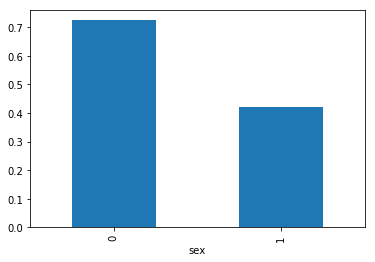

In [8]:
df.groupby('sex').target.mean().plot.bar()

=> 여자가 심장병에 걸릴 확률이 더 높음

### - 흉통 유형에 따른 심장병 걸릴 확률
#### - cp : 흉통 유형
#### - 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic

In [9]:
df.groupby('cp').target.mean()

cp
0    0.245473
1    0.802395
2    0.771127
3    0.662338
Name: target, dtype: float64

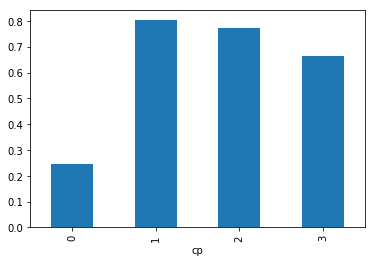

In [10]:
df.groupby('cp').target.mean().plot.bar()

### - 혈당에 따른 심장병 걸릴 확률
#### - fbs : 혈당 (> 120 mg/dl, 1 = true; 0 = false)

In [11]:
df.groupby('fbs').target.mean()

fbs
0    0.521789
1    0.464052
Name: target, dtype: float64

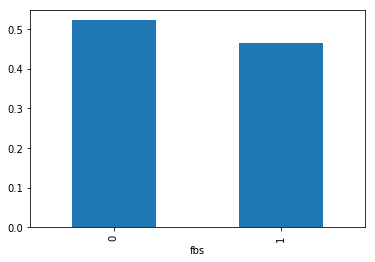

In [12]:
df.groupby('fbs').target.mean().plot.bar()

### - 심전도 결과에 따른 심장병 걸릴 확률
#### restecg :  (0 = normal, 1 = having ST-T wave abnormality, 
#### 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria) -> 좌심실 비대증

In [14]:
df.groupby('restecg').target.mean()

restecg
0    0.430584
1    0.602339
2    0.200000
Name: target, dtype: float64

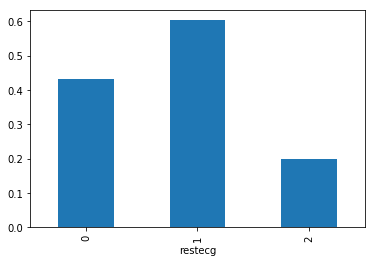

In [15]:
df.groupby('restecg').target.mean().plot.bar()

### - 협심증에 따른 심장병 걸릴 확률
#### - 운동 유발 협심증 (1 = yes; 0 = no)

In [18]:
df.groupby('exang').target.mean()

exang
0    0.669118
1    0.205797
Name: target, dtype: float64

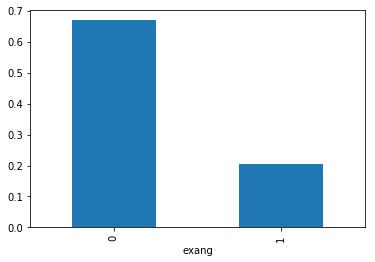

In [19]:
df.groupby('exang').target.mean().plot.bar()

### - 피크 운동의 기울기 ST 세그먼트에 따른 심장병 걸릴 확률
#### - 피크 운동의 기울기 ST 세그먼트(1: upsloping, 2: flat, 3: downsloping)

In [20]:
df.groupby('slope').target.mean()

slope
0    0.378378
1    0.327801
2    0.724947
Name: target, dtype: float64

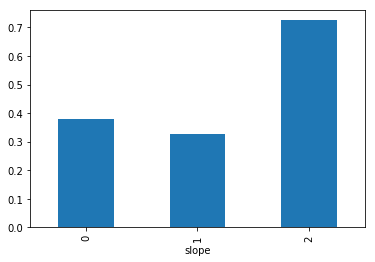

In [21]:
df.groupby('slope').target.mean().plot.bar()

### - 혈관수에 따른 심장병 걸릴 확률
#### - The number of major 혈관 (0,1,2,3,4)

In [22]:
df.groupby('ca').target.mean()

ca
0    0.717993
1    0.292035
2    0.156716
3    0.130435
4    0.833333
Name: target, dtype: float64

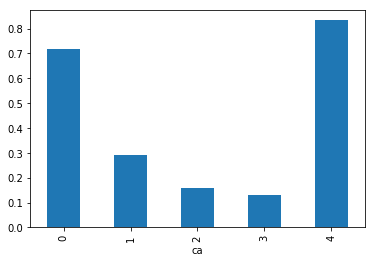

In [23]:
df.groupby('ca').target.mean().plot.bar()

### - thalassemia 의 유무에 따른 심장병 걸릴 확률
#### - thalassemia(지중해빈혈)라고 불리는 혈액 질환 (1 = normal; 2 = fixed defect; 3 = reversable defect)

In [24]:
df.groupby('thal').target.mean()

thal
0    0.428571
1    0.328125
2    0.757353
3    0.219512
Name: target, dtype: float64

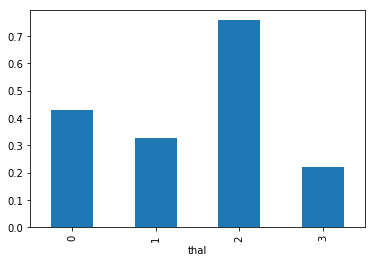

In [25]:
df.groupby('thal').target.mean().plot.bar()

## - 연속형 column에 대한 데이터

In [26]:
def draw_facetgrid(feature):
    facet = sns.FacetGrid(df, hue="target", aspect=5) # Multi-plot grid for plotting conditional relationships.
    facet.map(sns.kdeplot, feature, shade=True)
    facet.set(xlim=(0, df[feature].max()))
    
    facet.add_legend() 
    plt.show()

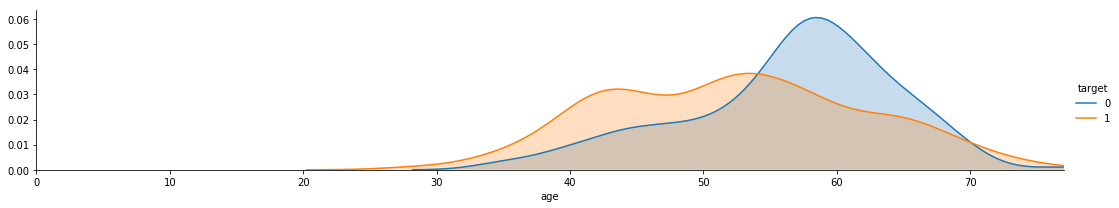

In [28]:
draw_facetgrid("age")

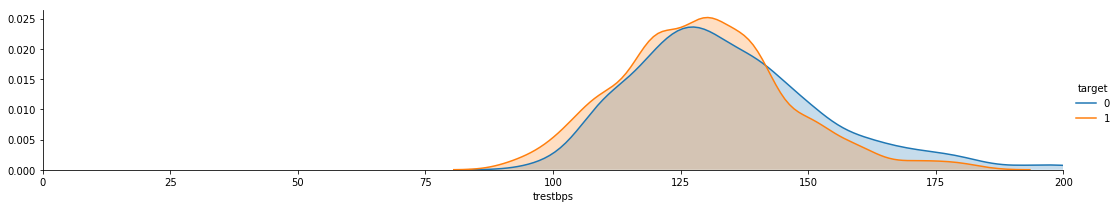

In [29]:
draw_facetgrid("trestbps") # 혈압

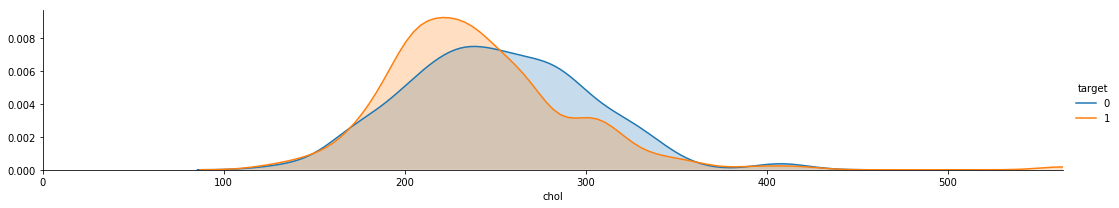

In [30]:
draw_facetgrid("chol") # 콜레스테롤

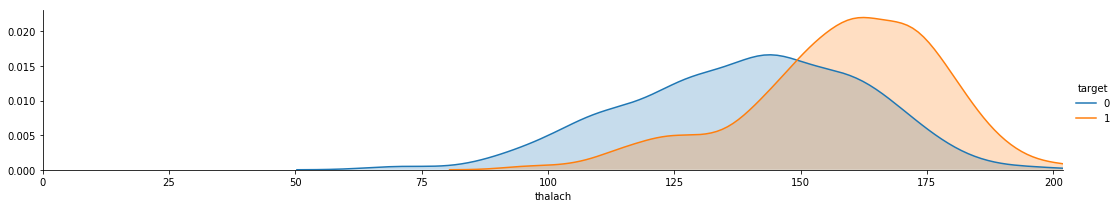

In [31]:
draw_facetgrid("thalach") # 최대 심박수

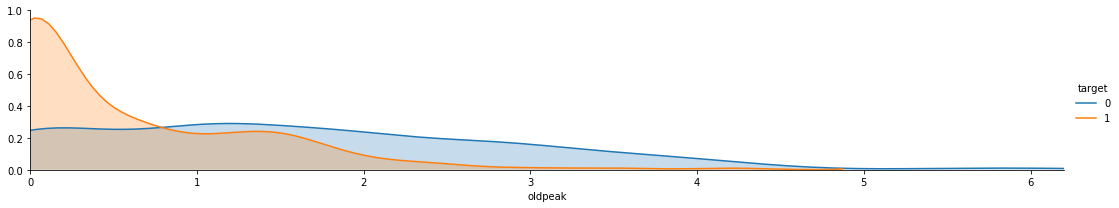

In [32]:
draw_facetgrid("oldpeak") # 우울증 지수

# 3, 연속형 -> 범주형으로 바꾸기

연속 값 : age,trestbps, chol, thalach, oldpeak

In [33]:
df[['age','trestbps', 'chol', 'thalach', 'oldpeak']].describe()

,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512
std,9.072290,17.516718,51.59251,23.005724,1.175053
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000
75%,61.000000,140.000000,275.00000,166.000000,1.800000
max,77.000000,200.000000,564.00000,202.000000,6.200000


age

In [34]:
bins = [0,29,48,56,61,78]
labels = [0,1,2,3,4]
cats_a = pd.cut(df.age, bins, labels=labels)

In [35]:
df1 = pd.DataFrame(df[["age"]], columns=["age"])
df1["age_cat"] = cats_a
df1.head()

,age,age_cat
0,52,2
1,53,2
2,70,4
3,61,3
4,62,4


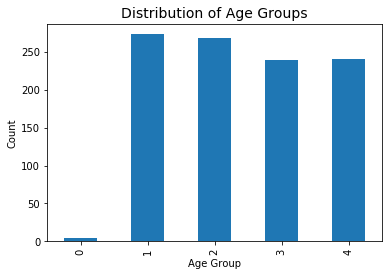

In [36]:
df1.groupby(['age_cat']).size().plot(kind='bar',stacked=True)
plt.title("Distribution of Age Groups",fontsize=14)
plt.ylabel('Count')
plt.xlabel('Age Group');

In [37]:
df["age"] = df1[["age_cat"]]

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,2,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,2,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,4,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,3,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,4,0,0,138,294,1,1,106,0,1.9,1,3,2,0


trestbps

In [38]:
bins = [0,94,120,130,140,201]
labels = [0,1,2,3,4]
cats_trestbps = pd.cut(df.trestbps, bins, labels=labels)

In [39]:
df['trestbps'] = cats_trestbps

chol

In [41]:
bins = [0,126,211,240,275,564]
labels = [0,1,2,3,4]
cats_chol = pd.cut(df.chol, bins, labels=labels)

In [42]:
df['chol'] = cats_chol

thalach

In [43]:
bins = [0,71,132,152,166,202]
labels = [0,1,2,3,4]
cats_thalach = pd.cut(df.thalach, bins, labels=labels)

In [44]:
df['thalach'] = cats_thalach

oldpeak

In [45]:
bins = [-2,0.8,1.8,6.2]
labels = [0,1,2]
cats_oldpeak = pd.cut(df.oldpeak, bins, labels=labels)

In [46]:
df['oldpeak'] = cats_oldpeak

In [48]:
df.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,2,1,0,2,2,0,1,4,0,1,2,2,3,0
1,2,1,0,3,1,1,0,3,1,2,0,0,3,0
2,4,1,0,4,1,0,1,1,1,2,0,0,3,0
3,3,1,0,4,1,0,1,3,0,0,2,1,3,0
4,4,0,0,3,4,1,1,1,0,2,1,3,2,0
5,3,0,0,1,3,0,0,1,0,1,1,0,2,1
6,3,1,0,1,4,0,2,2,0,2,0,3,1,0
7,2,1,0,4,4,0,0,2,1,0,1,1,3,0
8,1,1,0,1,3,0,0,2,0,0,2,0,3,0
9,2,1,0,2,4,0,0,1,1,2,1,2,2,0


# 4, 상관관계

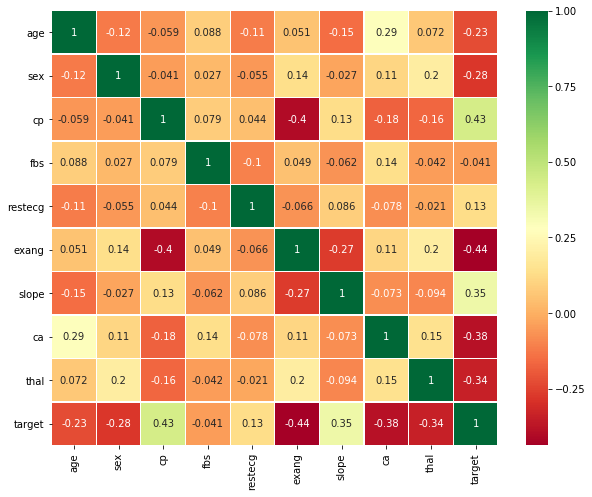

In [49]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

- target과 양의 상관계수 Top2 : cp(0.43), slope(0.35) 흉통유형, peak 운동의기울기
- target과 음의 상관계수 Top2 : exang(-0.44), ca(-0.38) 운동유발 협심증, 혈관 수

# 5, 모델 학습(머신러닝)

x_data, y_data 나누기

In [50]:
x_data = df.drop(['target'], axis=1)
y_data = df[['target']]

Train - Test split

In [51]:
# 행렬로

In [197]:
# x_data = np.array(x_data)
# y_target = np.array(y_data)

In [73]:
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.3, random_state=0)

In [74]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(717, 13)
(308, 13)
(717, 1)
(308, 1)


In [55]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [59]:
# 여러 모델 비교
def train_and_test(model):
    
    model.fit(x_train, y_train)
    
    print('Accuracy: ', round(accuracy_score(model.predict(x_test), y_test),4))
    

In [61]:
# Logistic Regression
log_pred = train_and_test(LogisticRegression())
# SVM+
svm_pred = train_and_test(SVC(kernel='rbf', probability=True))

#kNN
knn_pred_4 = train_and_test(KNeighborsClassifier(n_neighbors = 4))
# Random Forest
rf_pred = train_and_test(RandomForestClassifier(n_estimators=100))
# Decision Tree
dt_pred = train_and_test(DecisionTreeClassifier())
# Navie Bayes
nb_pred = train_and_test(GaussianNB())

Accuracy:  0.8831
Accuracy:  0.9123
Accuracy:  0.9026
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  0.8344


C:\Users\student\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\student\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), fo

# 6, 모델 학습(딥러닝)

one-hot

In [75]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(categories='auto')

enc.fit(y_train)
y_train = enc.transform(y_train).toarray()

enc.fit(y_test)
y_test = enc.transform(y_test).toarray()

print(y_train.shape)
print(y_test.shape)

(717, 2)
(308, 2)


In [64]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

import os
tf.logging.set_verbosity(tf.logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [65]:
model = models.Sequential() 

model.add(layers.Dense(input_dim=13, units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
# model.add(layers.BatchNormalization()) # Use this line as if needed
model.add(layers.Activation('elu')) # layers.ELU or layers.LeakyReLU

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 
model.add(layers.Dropout(rate=0.5))   # 매 layer에 넣을 필요 없음. 마지막 layer에만 이렇게 넣으면 된다.

model.add(layers.Dense(units=2, activation='softmax')) # One-hot vector for 0 & 1

In [66]:
model.compile(optimizer=optimizers.Adam(), 
              loss=losses.binary_crossentropy, 
              metrics=[metrics.categorical_accuracy]) 

In [69]:
history = model.fit(x_train, y_train, batch_size=100, epochs=50, validation_split=0.3) 

Train on 501 samples, validate on 216 samples
Epoch 1/50
501/501 [==============================] - 0s 82us/sample - loss: 0.5970 - categorical_accuracy: 0.7824 - val_loss: 0.5538 - val_categorical_accuracy: 0.8333
Epoch 2/50
501/501 [==============================] - 0s 84us/sample - loss: 0.5400 - categorical_accuracy: 0.8104 - val_loss: 0.6183 - val_categorical_accuracy: 0.7917
Epoch 3/50
501/501 [==============================] - 0s 86us/sample - loss: 0.5076 - categorical_accuracy: 0.8244 - val_loss: 0.5265 - val_categorical_accuracy: 0.8241
Epoch 4/50
501/501 [==============================] - 0s 90us/sample - loss: 0.4485 - categorical_accuracy: 0.8423 - val_loss: 0.5394 - val_categorical_accuracy: 0.8194
Epoch 5/50
501/501 [==============================] - 0s 84us/sample - loss: 0.4722 - categorical_accuracy: 0.8523 - val_loss: 0.5253 - val_categorical_accuracy: 0.8287
Epoch 6/50
501/501 [==============================] - 0s 90us/sample - loss: 0.3892 - categorical_accuracy: 0

Epoch 49/50
501/501 [==============================] - 0s 82us/sample - loss: 0.2172 - categorical_accuracy: 0.9182 - val_loss: 0.4530 - val_categorical_accuracy: 0.8472
Epoch 50/50
501/501 [==============================] - 0s 82us/sample - loss: 0.1969 - categorical_accuracy: 0.9321 - val_loss: 0.4131 - val_categorical_accuracy: 0.8935


In [70]:
result = model.evaluate(x_test, y_test, batch_size=100)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

308/308 [==============================] - 0s 26us/sample - loss: 0.2170 - categorical_accuracy: 0.9351
loss (cross-entropy) : 0.21698155650844822
test accuracy : 0.9350649
